__Research Q:__ <br> Out of all accidents that occur in intersections what is the distribution of accidents by intersection type?

<li>What percentage of accidents will be at irregular intersections?

In [2]:
import missingno as msno

import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt

In [4]:
accidentsdf = pd.read_csv('../data/odot/Multnomah.csv',low_memory=False)

In [5]:
l = accidentsdf.columns
for m in l:
    print(m, end='|')

Crash ID|Record Type|Vehicle ID|Participant ID|Participant Display Seq#|Vehicle Coded Seq#|Participant Vehicle Seq#|Serial #|Crash Month|Crash Day|Crash Year|Week Day Code|Crash Hour|County Code|City Section ID|Urban Area Code|Functional Class Code|NHS Flag|Highway Number|Highway Suffix|Roadway Number|Highway Component|Mileage Type|Connection Number|Linear Reference System (LRS)|Latitude Degrees|Latitude Minutes|Latitude Seconds|Longitude Degrees|Longitude Minutes|Longitude Seconds|Special Jurisdiction|Jurisdiction Group|Street Number|Nearest Intersecting Street Number|Intersection Sequence Number|Distance from Intersection|Direction From Intersection|Milepoint|Posted Speed Limit|Road Character|Off Roadway Flag|Intersection Type|Intersection Related Flag|Roundabout Flag|Driveway Related Flag|Number of Lanes|Number of Turning Legs|Median Type|Impact Location|Crash Type|Collision Type|Crash Severity|Weather Condition|Road Surface Condition|Light Condition|Traffic Control Device (TCD)|TCD

In [ ]:
accidentsdf[accidentsdf['Crash ID'] == 1456243]

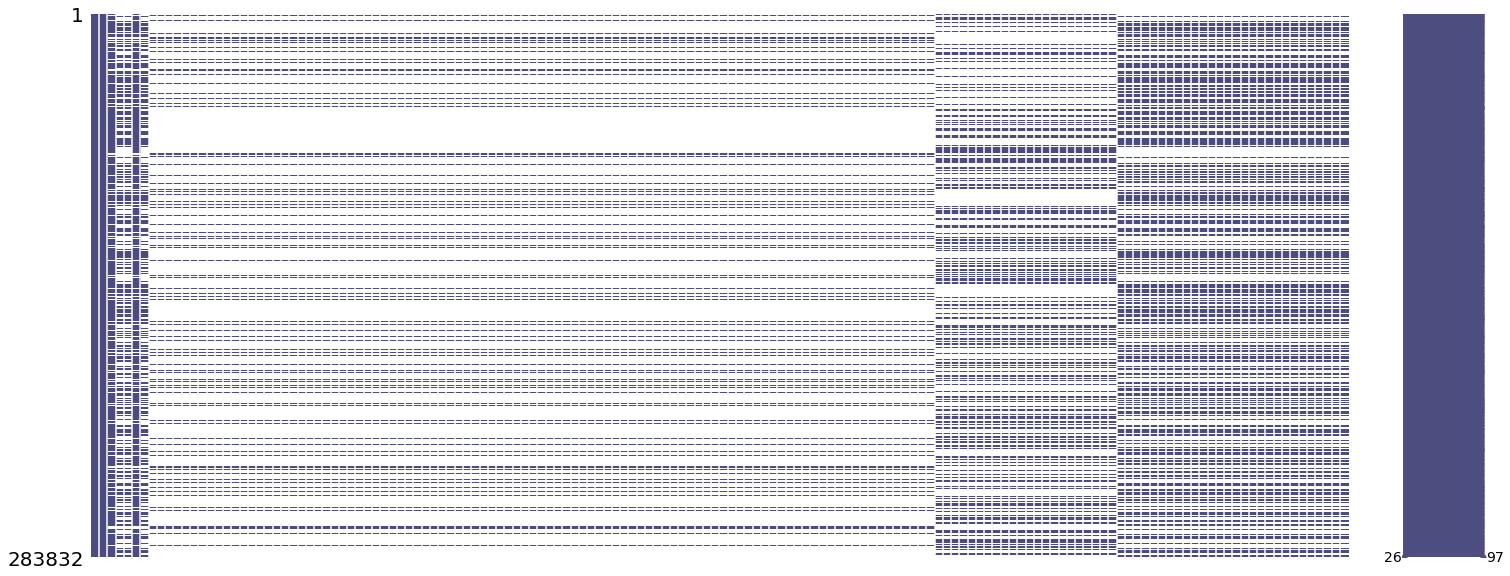

In [6]:
msno.matrix(accidentsdf,color=(.3, .3, .5))
plt.show()

In [7]:
it= {}
it[' ']='Not intersectional'
it['0']='Unknown intersection type'
it['1']='Cross' 
it['2']='1-legged'
it['3']='3-legged'
it['4']='4-legged'
it['5']='5-legged'
it['6']='6-legged'
it['7']='7-legged'
it['8']='8-legged'
it['9']='9-legged'

In [8]:
usedcol = ['Crash Type','Collision Type','Median Type','Crash Severity','Intersection Type','Crash ID',
           'Crash Year','Nearest Intersecting Street Number','Road Character']
accidentsdf = accidentsdf[usedcol].dropna().reset_index()
# accidentsdf.columns = ['Old Index','Crash Type','Collision Type','Crash Severity','Intersection Type','Crash ID','Crash Year','']
accidentsdf.to_csv('accidentintersections.csv')

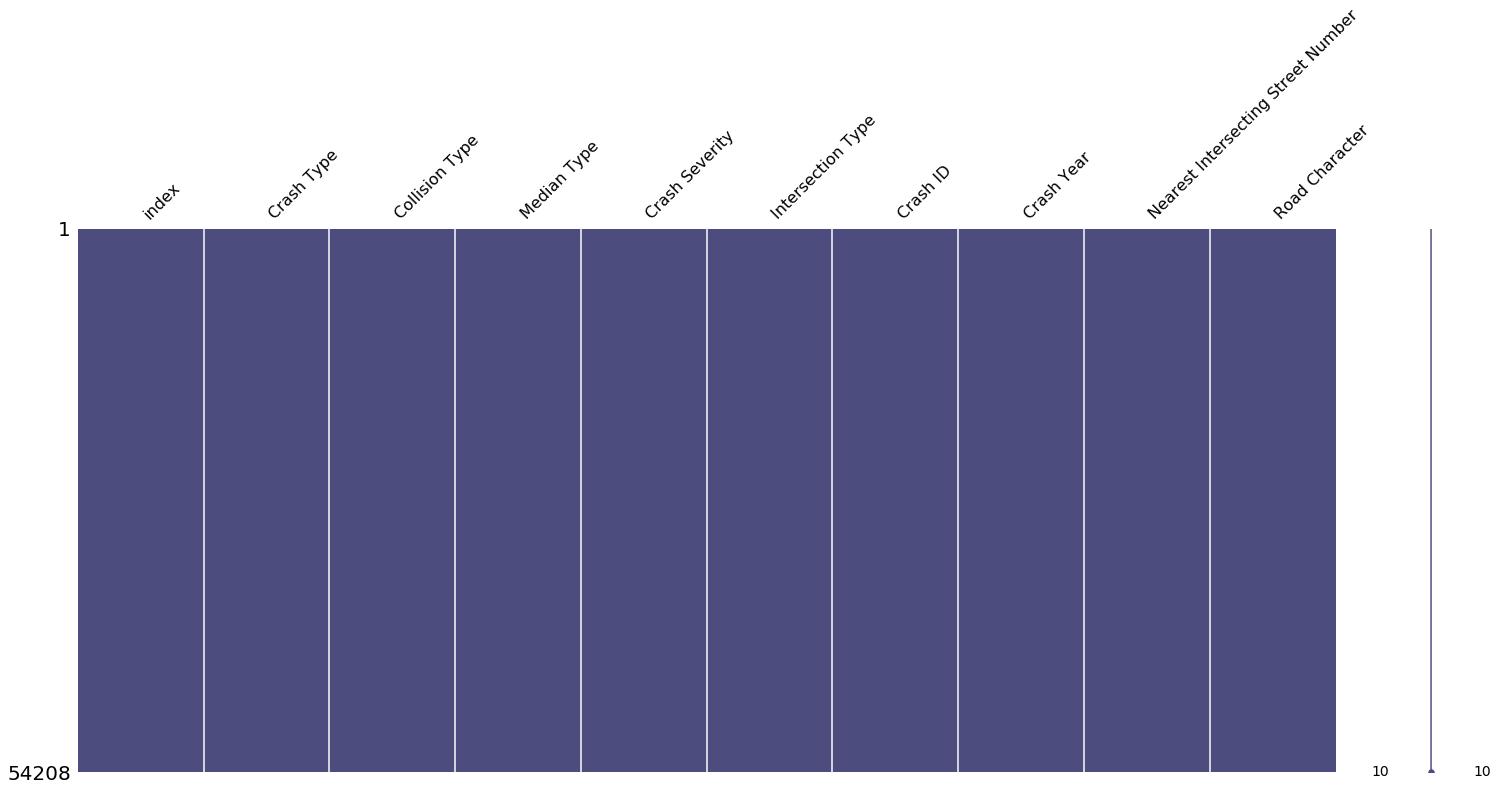

In [9]:
msno.matrix(accidentsdf,color=(.3, .3, .5))
plt.show()

In [10]:
types = dict(accidentsdf['Intersection Type'].value_counts())

In [9]:
types

{' ': 27127,
 '1': 18011,
 '3': 7300,
 '5': 860,
 '4': 655,
 '6': 155,
 '0': 57,
 '2': 43}

In [10]:
k = list(types.keys())
i = list(types.values())

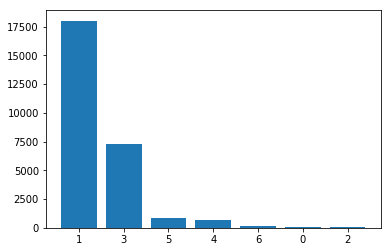

In [11]:
plt.bar(x=k[1:],height=i[1:])
plt.show()

In [12]:
accidentsdf.head()

,index,Crash Type,Collision Type,Median Type,Crash Severity,Intersection Type,Crash ID,Crash Year,Nearest Intersecting Street Number,Road Character
0,0,8,9,0,5.0,,1449628,2012.0,5142,3.0
1,5,3,0,0,4.0,,1449632,2012.0,5111,3.0
2,9,2,5,,5.0,1,1449640,2012.0,5112,1.0
3,14,B,1,,4.0,1,1449642,2012.0,5102,1.0
4,20,2,5,0,5.0,,1449649,2012.0,5079,3.0


In [13]:
accidentsdf[accidentsdf['Nearest Intersecting Street Number'] == '9101']

,index,Crash Type,Collision Type,Median Type,Crash Severity,Intersection Type,Crash ID,Crash Year,Nearest Intersecting Street Number,Road Character
27,132,E,3,0,4.0,,1449739,2012.0,9101,3.0
28,139,E,3,,4.0,3,1449740,2012.0,9101,1.0
179,921,8,9,1,4.0,,1450333,2012.0,9101,3.0
2195,11442,8,9,1,4.0,,1458966,2012.0,9101,3.0
3426,17871,C,5,1,5.0,,1463601,2012.0,9101,3.0
3874,20237,E,3,,5.0,6,1465644,2012.0,9101,1.0
4222,22056,C,5,1,4.0,,1467457,2012.0,9101,3.0
4338,22663,E,3,1,4.0,,1467979,2012.0,9101,3.0
4667,24405,E,3,,5.0,1,1469779,2012.0,9101,1.0
5036,26310,E,3,0,4.0,,1470895,2012.0,9101,3.0


In [14]:
ct = {}

ct['A']='Entering at angle - one vehicle stopped'
ct['B']='Entering at angle - all others'
ct['C']='From same direction - both going straight'
ct['D']='From same direction - one turn, one straight'
ct['E']='From same direction - one stopped'
ct['F']='From same direction - all others'
ct['G']='From opposite direction - both going straight'
ct['H']='From opposite direction - one left turn, one straight'
ct['I']='From opposite direction - one stopped'
ct['J']='From opposite direction - all others'
ct['1']='Motor vehicle on other roadway'
ct['2']='Parked motor vehicle'
ct['3']='Pedestrian'
ct['4']='Railway train'
ct['6']='Pedalcyclist'
ct['7']='Animal'
ct['8']='Fixed object'
ct['9']='Other object'
ct['&']='Overturned'
ct['0']='Other non-collision'

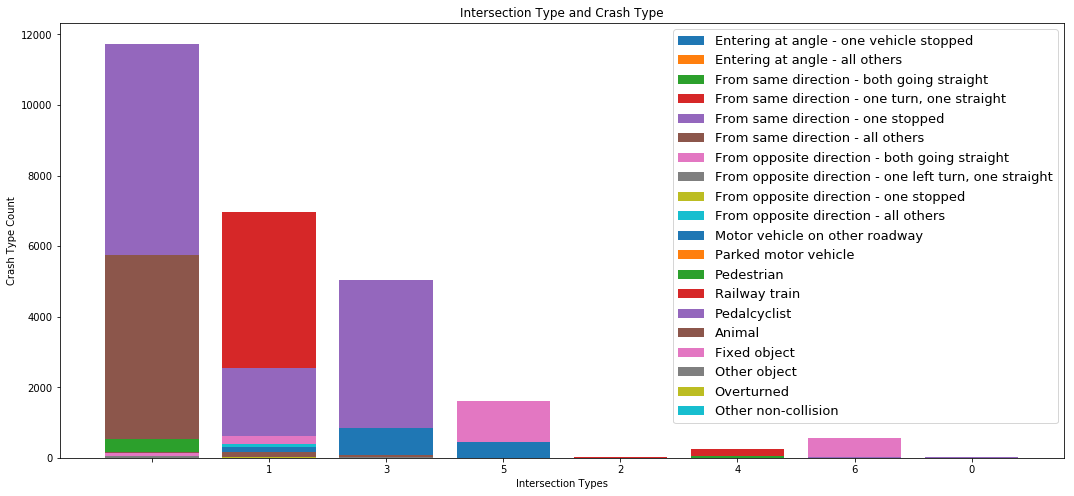

In [15]:
intercrashtype = plt.figure(figsize=(18,8))
for b in [accidentsdf['Intersection Type'][accidentsdf['Crash Type'] == s] for s in list(accidentsdf['Crash Type'].unique())]:
    x = list(b.unique())
    y = (list(b.value_counts()))
    plt.bar(x,y)
    plt.legend(ct.values(),fontsize=13)
plt.title('Intersection Type and Crash Type')
plt.xlabel('Intersection Types')
plt.ylabel('Crash Type Count')
plt.savefig('IntersectionCrash.png')
plt.show()

In [16]:
mt = {}
mt[' '] = 'Crash occurred inside intersection'
mt['0'] = 'No physical barrier between opposing traffic on single road bed. '
mt['1'] = 'Raised median, planter or barrier '
mt['2'] = 'Earth or grass median separating opposing traffic on two road beds'

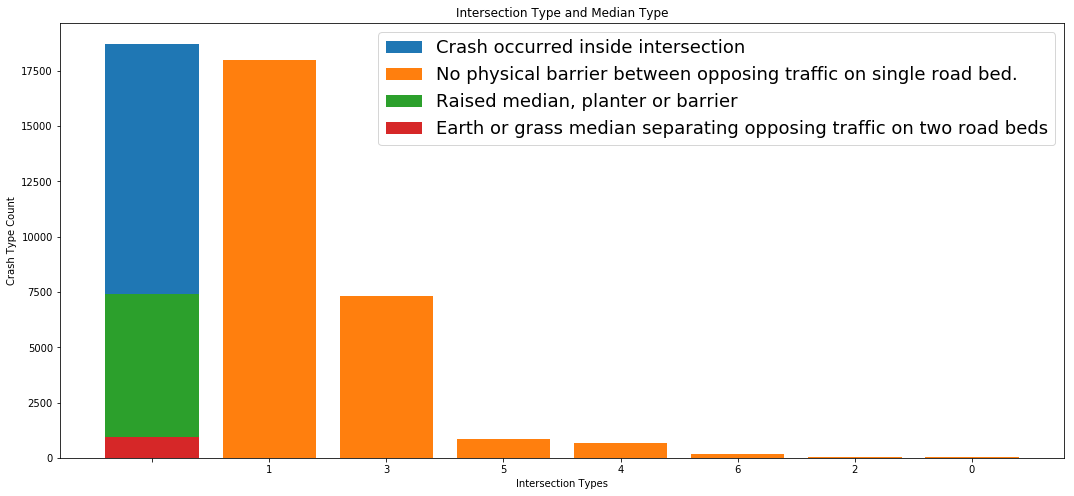

In [17]:
intermediantype = plt.figure(figsize=(18,8))
for b in [accidentsdf['Intersection Type'][accidentsdf['Median Type'] == s] for s in list(accidentsdf['Median Type'].unique())]:
    x = list(b.unique())
    y = (list(b.value_counts()))
    plt.bar(x,y)
    plt.legend(mt.values(),fontsize=18)
plt.title('Intersection Type and Median Type')
plt.xlabel('Intersection Types')
plt.ylabel('Crash Type Count')
plt.savefig('IntersectionMedian.png')
plt.show()

In [18]:
rc = {}
rc['1']='Intersection' 
rc['2']='Driveway or alley access'
rc['3']='Straight roadway'
rc['4']='Transition (change in number of lanes)' 
rc['5']='Curve (horizontal curve)'
rc['6']='Open access or turnout'
rc['7']='Grade / Hill (vertical curve)'
rc['8']='Bridge structure (including overpass and underpass)'
rc['9']='Tunnel' 
rc['0']='Unknown'

In [19]:
1456243accidentsdf[accidentsdf['Road Character'] == 6]

SyntaxError: invalid syntax (<ipython-input-19-af9e2afb7787>, line 1)

In [ ]:
interroadchartype = plt.figure(figsize=(18,8))
for b in [accidentsdf['Intersection Type'][accidentsdf['Road Character'] == s] for s in list(accidentsdf['Road Character'].unique())]:
    x = list(b.unique())
    y = (list(b.value_counts()))
    plt.bar(x,y)
    plt.show()
plt.legend(rc.values(),fontsize=18)
plt.title('Intersection Type and Road Character')
plt.xlabel('Intersection Types')
plt.ylabel('Crash Type Count')
plt.savefig('IntersectionCharacter.png')
plt.show()

_It appears that there are two different meanings for intersection. For the intersection type feature, all 'non-intersections' are labeled as Driveway or Alley Access. We are unable to answer our original question about irregular intersections using the Intersection Type as a feature_